# RELATÓRIO POR ESTADO SOBRE CORONA VÍRUS NO BRASIL

In [693]:
import pandas as pd


In [694]:
df = pd.read_csv("brazil_covid19.csv")

In [695]:
df.head()

,date,hour,state,suspects,refuses,cases,deaths
0,2020-01-30,16:00,Minas Gerais,1,0,0,0
1,2020-01-30,16:00,Rio de Janeiro,1,0,0,0
2,2020-01-30,16:00,Santa Catarina,0,2,0,0
3,2020-01-30,16:00,São Paulo,3,1,0,0
4,2020-01-30,16:00,Rio Grande do Sul,2,2,0,0


In [696]:
df = df.drop('hour',axis=1)

In [697]:
df.head()

,date,state,suspects,refuses,cases,deaths
0,2020-01-30,Minas Gerais,1,0,0,0
1,2020-01-30,Rio de Janeiro,1,0,0,0
2,2020-01-30,Santa Catarina,0,2,0,0
3,2020-01-30,São Paulo,3,1,0,0
4,2020-01-30,Rio Grande do Sul,2,2,0,0


# Escreva o nome do estado abaixo para gerar o relatório do estado que se deseja.

In [698]:
import collections

In [699]:
name_state = "São Paulo"
is_state =  df['state']== name_state

In [700]:
df[is_state].head()

,date,state,suspects,refuses,cases,deaths
3,2020-01-30,São Paulo,3,1,0,0
10,2020-01-31,São Paulo,7,2,0,0
17,2020-02-01,São Paulo,8,2,0,0
24,2020-02-02,São Paulo,8,2,0,0
31,2020-02-03,São Paulo,7,3,0,0


Altere a data aqui, quando conseguir o documento com dados de outras data. Esse filtro foi criado para evitar pegar dados com valor zero, por falta de informação

In [701]:
filter_date = df['date'] < '2020-03-19'
df = df[filter_date]
state =  df[is_state].drop('state', axis=1).groupby('date')


In [702]:
state.head()

,date,suspects,refuses,cases,deaths
3,2020-01-30,3,1,0,0
10,2020-01-31,7,2,0,0
17,2020-02-01,8,2,0,0
24,2020-02-02,8,2,0,0
31,2020-02-03,7,3,0,0
38,2020-02-04,6,5,0,0
45,2020-02-05,4,9,0,0
52,2020-02-06,3,10,0,0
59,2020-02-06,3,10,0,0
66,2020-02-07,3,11,0,0


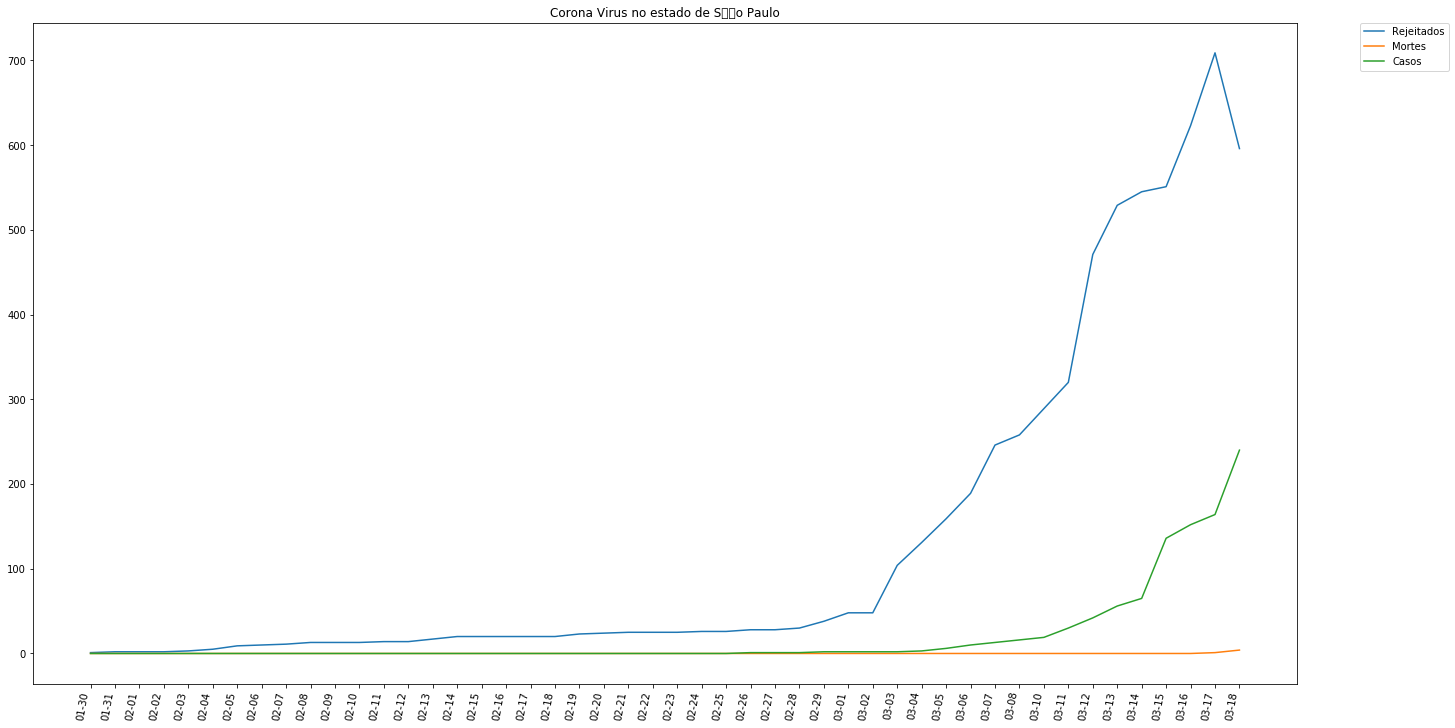

In [703]:
import operator


def transformDict (state, type_graph):
    col = state[type_graph].apply(lambda _df: int(np.unique(_df))).to_dict()
    col = collections.OrderedDict(sorted(col.items()))
    return col

refuse = transformDict(state, 'refuses')
death = transformDict(state, 'deaths')
case =  transformDict(state, 'cases')
suspect = transformDict(state, 'suspects')

keys =  [str(k[5:]) for k in refuse.keys()]

fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(20, 10))
axs.plot(keys, refuse.values(), label="Rejeitados")
axs.plot(keys,death.values(), label="Mortes")
axs.plot(keys,case.values(), label="Casos")

#axs.plot(keys,suspect.values(), label="Suspeitos")
for label in axs.get_xticklabels():
    label.set_rotation(80)
    label.set_horizontalalignment('right')
axs.set_title("Corona Virus no estado de "+ name_state)
axs.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


In [704]:
data = [[name_state,suspect.popitem()[1], refuse.popitem()[1],case.popitem()[1],death.popitem()[1]]]
pd.DataFrame(data, columns=["Estado","Suspeitos", "Rejeitados","Casos","Mortes"])

,Estado,Suspeitos,Rejeitados,Casos,Mortes
0,São Paulo,5334,596,240,4
